In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
dataset_path = "food_data"

In [5]:
food_categories = os.listdir(dataset_path)

In [6]:
selected_categories = food_categories[:10]

In [7]:
selected_categories

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [8]:
def load_preprocess_data(image_path,target_size = (224,224)):
    img = load_img(image_path,target_size = target_size,color_mode='rgb')
    img_array = img_to_array(img)
    img_array = img_array/255
    return img_array

In [9]:
X = []
y = []

In [10]:
for i, category in enumerate(selected_categories):
    category_path = os.path.join(dataset_path,category)
    #print("category_path")
    for image_name in os.listdir(category_path)[:100]:
        image_path = os.path.join(category_path,image_name)
        X.append(load_preprocess_data(image_path))
        y.append(i)

In [11]:
X = np.array(X)

In [12]:
y = np.array(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

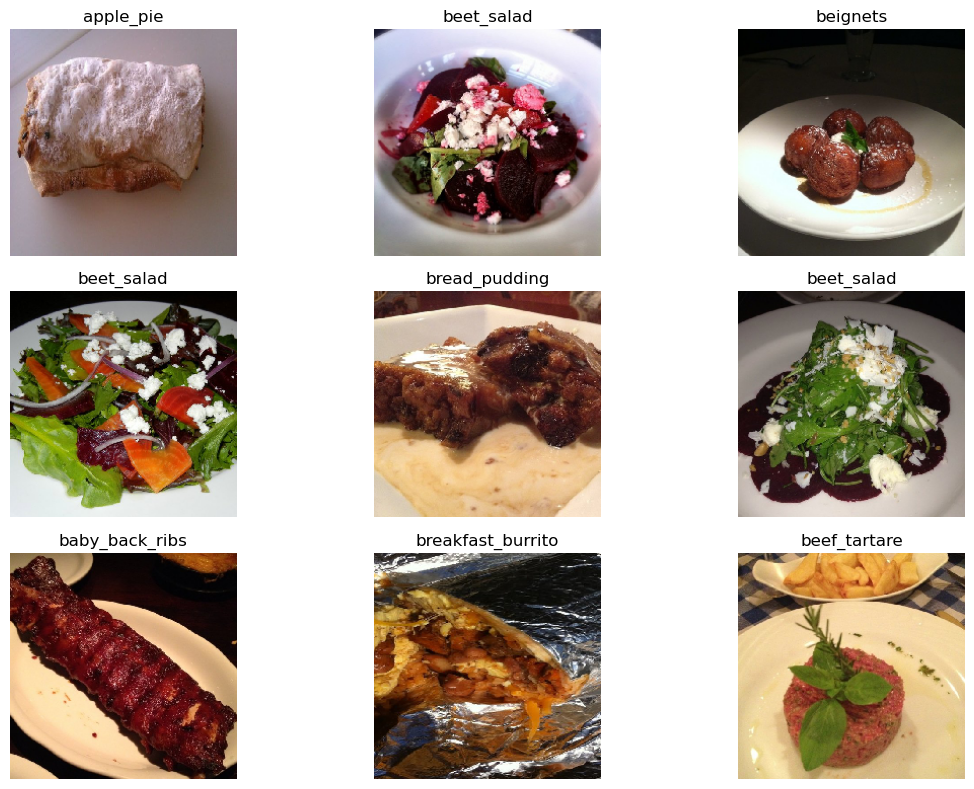

In [14]:
plt.figure(figsize=(12,8))
for i in range(9):
    plt.subplot( 3, 3 , i+1)
    plt.imshow(X_train[i])
    plt.title(selected_categories[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32,(3,3),activation="relu",input_shape = input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation="relu"),
        Flatten(),
        Dense(64,activation="relu"),
        Dropout(0.5),
        Dense(num_classes,activation="softmax")
               ])
    return model

In [16]:
model=create_model(input_shape=(224,224,3),num_classes=len(selected_categories))

C:\Users\srava\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,132,618 (42.47 MB)

 Trainable params: 11,132,618 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
history = model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.1245 - loss: 3.4401 - val_accuracy: 0.1300 - val_loss: 2.2845
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.1887 - loss: 2.2509 - val_accuracy: 0.1550 - val_loss: 2.2508
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.2472 - loss: 2.0981 - val_accuracy: 0.2100 - val_loss: 2.1816
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - accuracy: 0.2900 - loss: 2.0397 - val_accuracy: 0.2100 - val_loss: 2.1438
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.3649 - loss: 1.7953 - val_accuracy: 0.2250 - val_loss: 2.0944
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.5170 - loss: 1.5157 - val_accuracy: 0.1900 - val_loss: 2.1799
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - accuracy: 0.6138 - loss: 1.2154 - val_accuracy: 0.2050 - val_loss: 2.2867
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.7289 - loss: 0.8343 - val_accuracy: 0.

In [20]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'                      
)


In [21]:
history = model.fit(datagen.flow(X_train,y_train,batch_size=32),epochs=20,validation_data=(X_test,y_test))

Epoch 1/20


C:\Users\srava\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.1625 - loss: 3.1578 - val_accuracy: 0.1850 - val_loss: 2.2090
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step - accuracy: 0.1507 - loss: 2.2538 - val_accuracy: 0.2100 - val_loss: 2.1899
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.1764 - loss: 2.2537 - val_accuracy: 0.2050 - val_loss: 2.2562
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - accuracy: 0.1851 - loss: 2.1950 - val_accuracy: 0.3000 - val_loss: 2.0900
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step - accuracy: 0.1859 - loss: 2.2061 - val_accuracy: 0.2250 - val_loss: 2.1400
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 388ms/step - accuracy: 0.2088 - loss: 2.1869 - val_accuracy: 0.3050 - val_loss: 2.1168
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.2485 - loss: 2.1606 - val_accuracy: 0.2500 - val_loss: 2.1283
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step - accuracy: 0.2323 - loss: 2.1304 - val_accuracy: 0.285

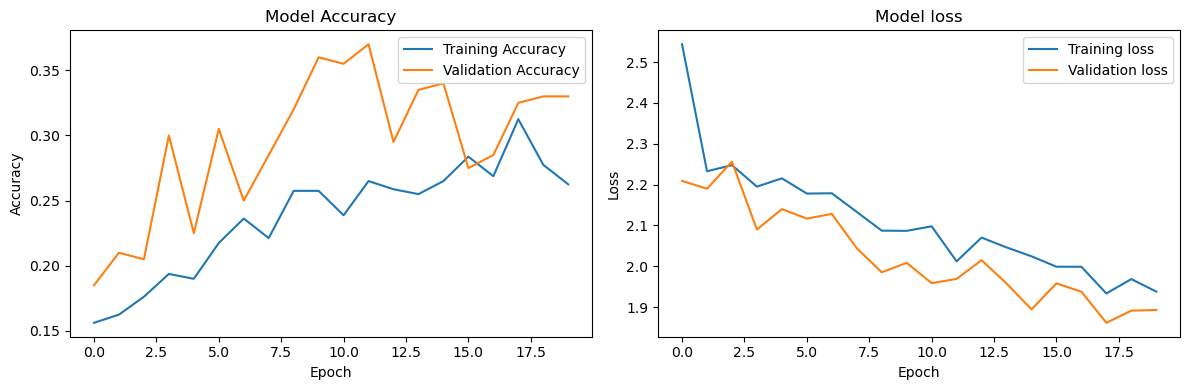

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
test_loss,test_acc = model.evaluate(X_test,y_test,verbose=2)
print("Test accuracy:",test_acc)

7/7 - 0s - 67ms/step - accuracy: 0.3300 - loss: 1.8931
Test accuracy: 0.33000001311302185


In [24]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)

print(classification_report(y_test,y_pred_classes,target_names=selected_categories))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
                   precision    recall  f1-score   support

        apple_pie       0.44      0.35      0.39        20
   baby_back_ribs       0.20      0.77      0.32        13
          baklava       0.27      0.26      0.26        27
   beef_carpaccio       0.72      0.62      0.67        21
     beef_tartare       0.33      0.27      0.30        15
       beet_salad       0.30      0.32      0.31        22
         beignets       0.32      0.36      0.34        25
         bibimbap       0.47      0.54      0.50        13
    bread_pudding       0.20      0.09      0.12        23
breakfast_burrito       0.00      0.00      0.00        21

         accuracy                           0.33       200
        macro avg       0.33      0.36      0.32       200
     weighted avg       0.32      0.33      0.31       200



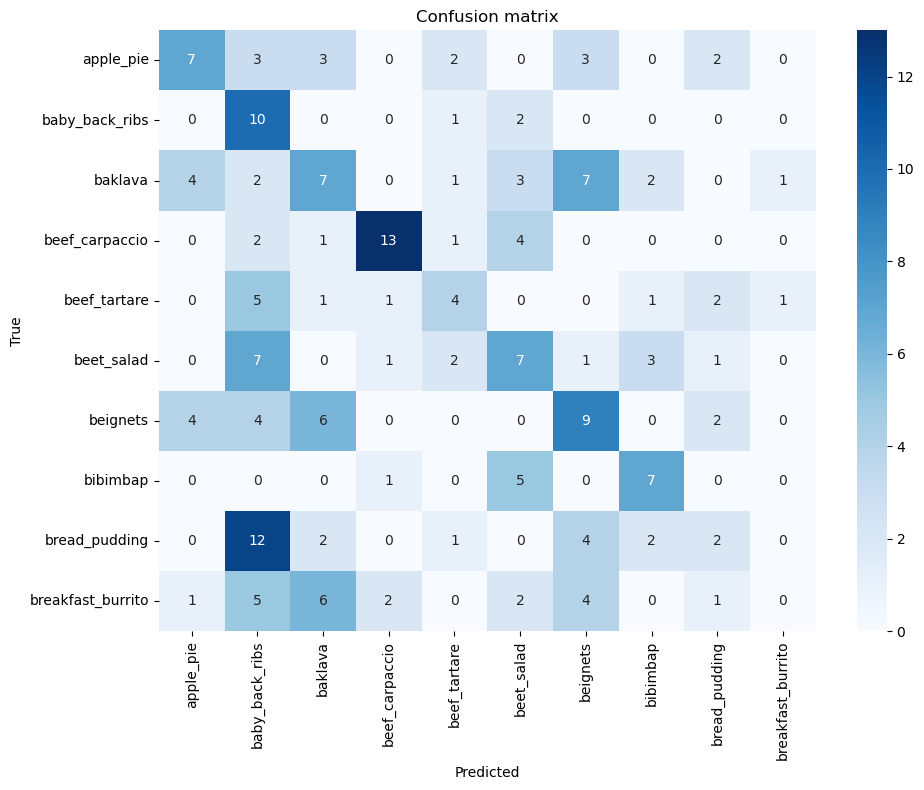

In [51]:
conf_mat = confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=selected_categories,yticklabels=selected_categories)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


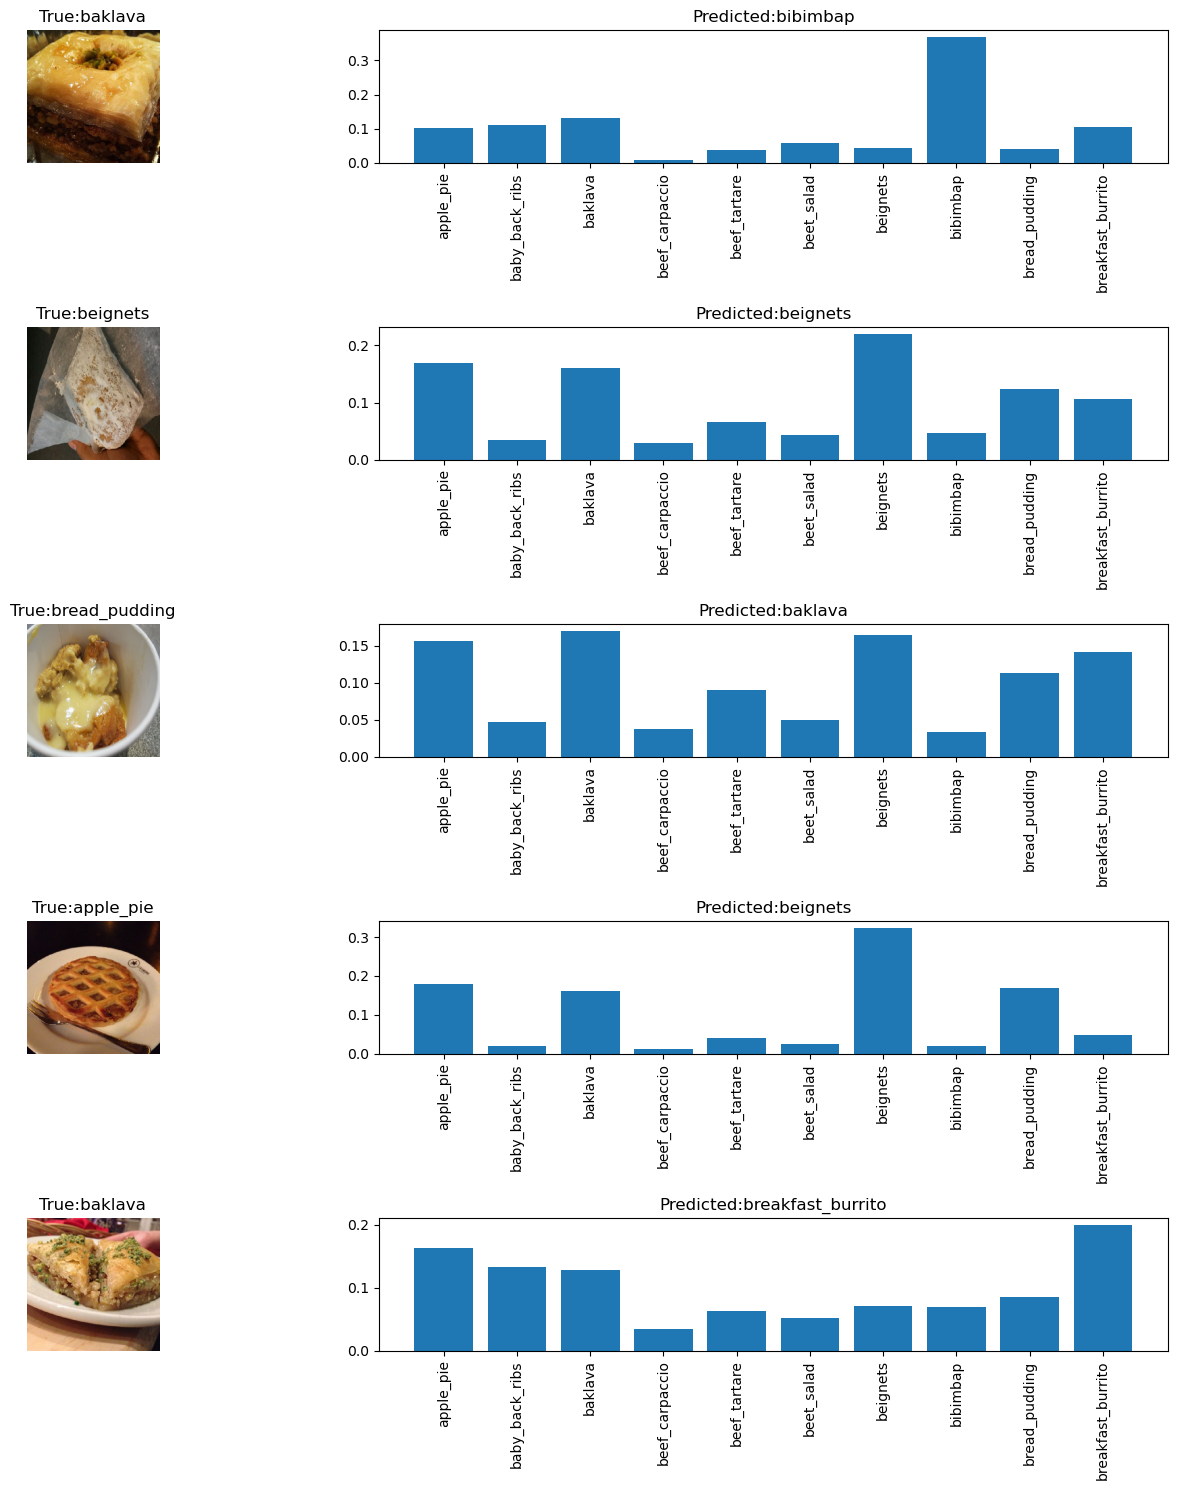

In [80]:
def predict_and_plot(model,X,y,n_samples=5):
    indices = np.random.choice(range(len(X)),n_samples,replace=False)

    plt.figure(figsize=(15,3*n_samples))
    for i,idx in enumerate(indices):
        img=X[idx]
        true_label = y[idx]
        pred=model.predict(np.expand_dims(img,axis=0))[0]
        pred_label=np.argmax(pred)

        plt.subplot(n_samples,2,2*i+1)
        plt.imshow(img)
        plt.title(f"True:{selected_categories[true_label]}")
        plt.axis('off')

        plt.subplot(n_samples,2,2*i+2)
        plt.bar(range(len(selected_categories)),pred)
        plt.title(f"Predicted:{selected_categories[pred_label]}")
        plt.xticks(range(len(selected_categories)),selected_categories,rotation=90)

    plt.tight_layout()
    plt.show()
predict_and_plot(model,X_test,y_test)